# EE315 Design Project

# Group A - Bingo

Create a Bingo card!

The below method generates an array of random numbers and sorts them into a bingo card format.

The cell below requires user input to determine the number of cards to generate.

In [8]:
players = input("How many players? \n Tip: Press return after you enter the number \n")

How many players? 
 Tip: Press return after you enter the number 
2


Importing the overlay class.

In [9]:
from pynq import Overlay

Program the Overlay (the design of which is seen below) onto the PYNQ-Z2, and parse the Hwh file
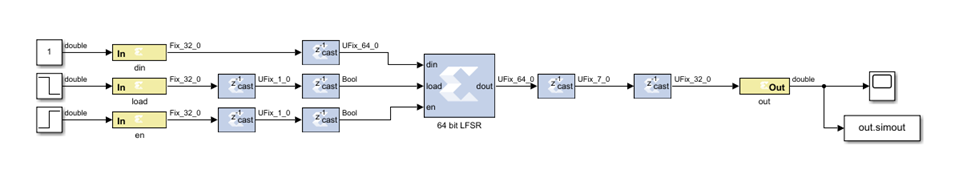

In [10]:
ol = Overlay("Overlays/rng.bit")

Importing the required libraries.

In [11]:
import random
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Audio
from IPython.display import clear_output
from time import sleep
import threading

Load RNG from Overlay and assign interface addresses to variables

In [12]:
rng = ol.rng_0

load_address=0x00  #load address
en_address=0x04    #enable address
din_address=0x08   #data to be loaded address
out_address=0x0C   #output address

In [13]:
rng.write(load_address, 0) #don't load an intial value (defaults to 1)
rng.write(en_address, 1)   #enable RNG

In [14]:
my_list=[]
for i in range (1,91):
    my_list.append(i)

The call_number_func() ensures that the number generated cannot be greater than 90. If it is then it regenerates it and appends it to a list of random numbers. 

In [15]:
def call_number_func():
    RNG_number = rng.read(out_address)
    while RNG_number>len(my_list)-1:
        RNG_number = rng.read(out_address)

    if len(call_list)<90:
        call_number = my_list[RNG_number]
        filename= "./Sounds/"+str(call_number)+".wav"
        display(Audio(filename, autoplay=True));
    
        my_list.remove(call_number)

        call_list.append(call_number)

This is where any lists are initialised within the model. 

In [16]:
button_list=[]
call_list=[]

Bingo Card refresh variables

In [17]:
count = 0
refreshRate = 10

The function button_on_click allows the individual bingo buttons to change colour when the user presses to "score off" a number. The user can, also, click again and this value will return to the original colour and be removed from any lists stored. 

In [18]:
def button_on_click(myButton):
    value = int(myButton.description)
    
    if myButton.style.button_color == 'green':
        myButton.style.button_color = 'orange'
        
        if not value in call_list:
            delValueFromLists(value)
    
    else:
        myButton.style.button_color = 'green'
        addValueToLists(value)

The compareValues function is called when the user presses 'Bingo!'. This function then takes in the numbers pressed by the user on the card and also the numbers called out which have been generated. The function compares values to check that numPressed is a subset of call_list, otherwise it tells the user they are incorrect and shows which values were wrong. 

In [19]:
def compareValues(numPressed, call_list, bingoButton):
    wrongNumberList = []
    sleep(1)
    list1=list(map(int, numPressed))     #This changes list from strings to ints
    list2=list(map(int, call_list))
    list1 = list(dict.fromkeys(list1))   #converts to dict then back to list to remove duplicates
    numReq = cardSize*cardSize           #number of numbers required for bingo
    
    for element in list1:
        if element not in list2:
            wrongNumberList.append(element)
    
    if len(list1)==numReq:
        if (all(item in list2 for item in list1)): 
            print("Congratulations, it's Bingo!")
            event.set()
            display(Audio("./Sounds/ThatsABingo.mp3", autoplay =True))
            bingoButton.style.button_color = 'green'
        else:
            print("Unfortunately, these numbers do not match. These numbers are incorrect " + str(wrongNumberList)) 
            bingoButton.style.button_color = 'red'
            sleep(1)
            bingoButton.style.button_color = 'orange'
            
    else:
        print("Unfortunately, there are not the right amount of numbers for Bingo")
        bingoButton.style.button_color = 'red'
        sleep(1)
        bingoButton.style.button_color = 'orange'

The function allows a user to pause play, especially if the numbers are being called too quick for a player. Likewise, the game can resume play by pressing the pauseButton again.

In [20]:
def pausePressed(pauseButton):
    pauseButton
    pauseButton.style.button_color = 'LightSteelBlue'
    
    if event.is_set():
        x = threading.Thread(target=thread_function, args=())
        event.clear()
        x.start()
    else:
        event.set()
        
    sleep(1)
    pauseButton.style.button_color = 'SteelBlue'

The function below, bingoPressed(), is so the user can call 'Bingo' when they believe they have a full house. It calls to the compareValues() function to allow validation of the bingo card. 

In [21]:
def bingoPressed(bingoButton):
    bingoButton
    ind = int(bingoButton.description[-1])-1
    bingoButton.style.button_color = 'blue'
    bingoButton = compareValues(numPressLst[ind], call_list, bingoButton) 

Implementing the bingo card based upon the number of players and size of the card required. 

Through the use of a for loop, the numbers within the card can be generated and placed in a ipywidget layout. This layout creates a grid which is sized using the cardSize * cardSize. 

For the bingo game to be interactive, the need to implement a form of user interaction, such as scoring off the number called, was required. This is achieved by creating a for loop which has a callback element and calls the function above, button_on_click().

The creation of a call bingo button is, also, implemented within this loop. 

In [22]:
cardSize = 4
minNum = 1
maxNum = 90
noCards = int(players)
myCards = []
bingos = []
cardNumbersList = []

for i in range(noCards):
    card = []
    randRange = range(minNum, maxNum)
    card = random.sample(randRange, cardSize * cardSize)
    cardNumbersList.append(card)
    card.sort()
    
    buttons = []
    
    myButton = widgets.GridBox(children=[widgets.Button(description=str(num), layout=widgets.Layout(width='auto', height='auto'),
                 button_style='warning') for num in card],

                layout=widgets.Layout(
                                    width='80%',
                                    grid_template_columns='20%'*cardSize,
                                    grid_template_rows='40px'*cardSize,
                                    grid_gap='1px 2px')
                           )
    
    for button in myButton.children:
        button.on_click(button_on_click)
            
    myCards.append(myButton)
    
  
    
    bingoButton = widgets.GridBox(children=[widgets.Button(description='Bingo - Player ' + str(i+1), layout=widgets.Layout(width='auto', height='auto'),
                 button_style='warning') ],

                layout=widgets.Layout(
                                    width='60%',
                                    grid_template_columns='20%',
                                    grid_template_rows='40px',
                                    grid_gap='1px 2px')
                            
                                 )
    
    for bingo in bingoButton.children:
        bingo.on_click(bingoPressed)

    bingos.append(bingoButton)
    
    pauseButton = widgets.Button(description='Pause/Play', button_style='warning')

    pauseButton.on_click(pausePressed)

The functions below, addValueToLists() and delValueFromLists(), allow the user to select and unselect numbers they have scored off on their card. The unselect feature can be used for mistakes made by the user. 

In [23]:
numPressLst = [[] for _ in range(noCards)] 

def addValueToLists(value):
    for list in cardNumbersList:
        if value in list:
            numPressLst[cardNumbersList.index(list)].append(value)

In [24]:
def delValueFromLists(value):
    for list in numPressLst:
        if value in list:
            list.remove(value)

The for loop below allows the bingo cards to be generated and is where the user can interact with the game. 

In [25]:
def bingoCards():
    clear_output(False)
    display(pauseButton)
    for idx, card in enumerate(myCards):
        display(card)
        display(bingos[idx]) 

In [26]:
def startBingo(start):
    bingoCards()
    x.start()

The creation of a 'Start' button for the user is initialised below and implements the feature that when pressed, it prints the bingo cards for the game. 

In [27]:
start = widgets.Button(description='Start Bingo', button_style='primary')
start.on_click(startBingo)

The use of threading allows the game to be played and numbers to called asynchronously.

In [28]:
event = threading.Event()

In [29]:
event.set()

The implementation of thread_function() calls to the call_number_func() to sound the next number being called. The if statement is implemented, as once all the numbers have been called it will return an index of out range error, as a player should have called Bingo by this point.

In [30]:
def thread_function():
    global count
    while(True):
        if count > 10:
            bingoCards()
            count = 0
        call_number_func()
        sleep(7)
        if len(call_list)==90:
            event.set()
        if event.is_set():
            break
        count=count+1

In [31]:
x = threading.Thread(target=thread_function, args=())
event.clear()

In [32]:
start

Button(button_style='primary', description='Start Bingo', style=ButtonStyle())